<a href="https://colab.research.google.com/github/AndrewstheBuilder/ScratchNeuralNetworks/blob/main/Pytorch_CNN_KaggleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# !kaggle datasets download -d puneet6060/intel-image-classification
# !unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [45]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [46]:
transform = transforms.Compose(
    [ transforms.Resize((64, 64)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data_path = './seg_train/seg_train/'
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)

test_data_path = './seg_test/seg_test/'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)

In [47]:
batch_size = 32 # You can adjust the batch size based on memory availability
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
classes = train_dataset.classes

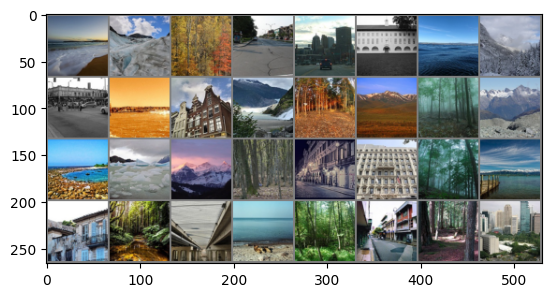

sea   glacier forest street buildings buildings sea   mountain street sea   buildings glacier forest mountain forest glacier sea   glacier mountain forest street buildings forest sea   buildings forest buildings sea   forest street forest buildings


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
classes = train_dataset.classes

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [56]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding='same')
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, 3, padding='same')
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, 3, padding='same')
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 84)
        self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [66]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epochs=5

In [67]:
net.train()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        # for name, param in net.named_parameters():
        #   if param.requires_grad:
        #       print(f'{name} grad: {param.grad.abs().mean()}')
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % batch_size == batch_size-1:    # print every batch_size mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / batch_size:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    32] loss: 0.069
[1,    64] loss: 0.115
[1,    96] loss: 0.095
[1,   128] loss: 0.107
[1,   160] loss: 0.098
[1,   192] loss: 0.084
[1,   224] loss: 0.070
[1,   256] loss: 0.098
[1,   288] loss: 0.124
[1,   320] loss: 0.100
[1,   352] loss: 0.134
[1,   384] loss: 0.101
[1,   416] loss: 0.104
[2,    32] loss: 0.052
[2,    64] loss: 0.040
[2,    96] loss: 0.039
[2,   128] loss: 0.053
[2,   160] loss: 0.071
[2,   192] loss: 0.062
[2,   224] loss: 0.096
[2,   256] loss: 0.105
[2,   288] loss: 0.087
[2,   320] loss: 0.101
[2,   352] loss: 0.099
[2,   384] loss: 0.078
[2,   416] loss: 0.069
[3,    32] loss: 0.077
[3,    64] loss: 0.040
[3,    96] loss: 0.066
[3,   128] loss: 0.041
[3,   160] loss: 0.064
[3,   192] loss: 0.071
[3,   224] loss: 0.062
[3,   256] loss: 0.056
[3,   288] loss: 0.045
[3,   320] loss: 0.069
[3,   352] loss: 0.080
[3,   384] loss: 0.052
[3,   416] loss: 0.055
[4,    32] loss: 0.048
[4,    64] loss: 0.027
[4,    96] loss: 0.034
[4,   128] loss: 0.046
[4,   160] 

In [54]:
print('labels',labels)
classes = train_dataset.classes
print('classes',classes)
t = torch.tensor([[[1, 2],[3, 4]],[[5, 6],[7, 8]]])
print('t.shape',t.shape)
t_flat = torch.flatten(t, 1)
print('t_flat.shape',t_flat.shape)

labels tensor([3, 1, 2, 5, 3, 5, 1, 0, 2, 0, 1, 1, 2, 3, 0, 2, 1, 0, 4, 2, 4, 5, 2, 4,
        2, 4, 0, 1, 1, 0, 5, 4])
classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
t.shape torch.Size([2, 2, 2])
t_flat.shape torch.Size([2, 4])


In [59]:
PATH = './kaggle_net.pth'
torch.save(net.state_dict(), PATH)

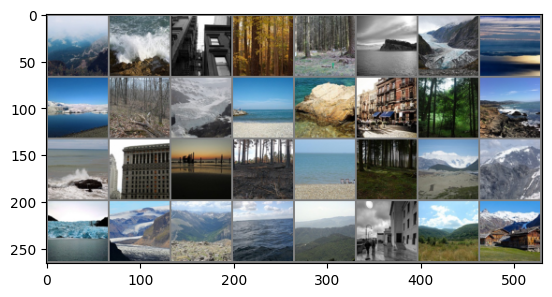

GroundTruth:  mountain sea   buildings forest


In [60]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [61]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [62]:
outputs = net(images)

In [63]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  mountain glacier buildings forest


In [68]:
correct = 0
total = 0
# Set the model to evaluation mode
net.eval()

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 82 %


In [69]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# Set the model to evaluation mode
net.eval()

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: buildings is 82.4 %
Accuracy for class: forest is 94.3 %
Accuracy for class: glacier is 77.0 %
Accuracy for class: mountain is 81.5 %
Accuracy for class: sea   is 82.2 %
Accuracy for class: street is 81.4 %
